In [29]:
# cnn model
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical

In [2]:
# load a single file as a numpy array
def load_file(filepath):
 dataframe = read_csv(filepath, header=None, delim_whitespace=True)
 return dataframe.values

In [3]:
# load a list of files and return as a 3d numpy array
def load_group(filenames, prefix=''):
 loaded = list()
 for name in filenames:
  data = load_file(prefix + name)
  loaded.append(data)
 #print('------before_dstack------')   
 #print(loaded) 
 # stack group so that features are the 3rd dimension
 loaded = dstack(loaded)
 #print('------after_dstack------')
 #print(loaded)
 return loaded

In [4]:
# load a dataset group, such as train or test
def load_dataset_group(group, prefix=''):
 filepath = prefix + group + '/Inertial Signals/'
 # load all 9 files as a single array
 filenames = list()
 # total acceleration
 filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
 # body acceleration
 filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
 # body gyroscope
 filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
 # load input data
 X = load_group(filenames, filepath)
 # load class output
 y = load_file(prefix + group + '/y_'+group+'.txt')
 return X, y

In [5]:
#load the dataset, returns train and test X and y elements
def load_dataset(prefix=''):
 # load all train
 trainX, trainy = load_dataset_group('train', prefix + 'HARDataset/')
 print(trainX.shape, trainy.shape)
 # load all test
 testX, testy = load_dataset_group('test', prefix + 'HARDataset/')
 print(testX.shape, testy.shape)
 # zero-offset class values ------?
 trainy = trainy - 1
 testy = testy - 1
 # one hot encode y -------?
 trainy = to_categorical(trainy)
 testy = to_categorical(testy)
 print(trainX.shape, trainy.shape, testX.shape, testy.shape)
 return trainX, trainy, testX, testy

In [6]:
# fit and evaluate a model
def evaluate_model_C1D2(trainX, trainy, testX, testy):
 verbose, epochs, batch_size = 0, 10, 32
 n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
 model = Sequential()
 model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
 model.add(MaxPooling1D(pool_size=2))
 model.add(Flatten())
 model.add(Dense(100, activation='relu'))
 model.add(Dense(n_outputs, activation='softmax'))
 model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 # fit network
 model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
 # evaluate model
 _, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
 return accuracy

In [7]:
# fit and evaluate a model
def evaluate_model_C1D3(trainX, trainy, testX, testy):
 verbose, epochs, batch_size = 0, 10, 32
 n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
 model = Sequential()
 model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
 model.add(MaxPooling1D(pool_size=2))
 model.add(Flatten())
 model.add(Dense(100, activation='relu'))
 model.add(Dense(64, activation='relu'))
 model.add(Dense(n_outputs, activation='softmax'))
 model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 # fit network
 model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
 # evaluate model
 _, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
 return accuracy

In [8]:
# fit and evaluate a model
def evaluate_model_C2D1(trainX, trainy, testX, testy):
 verbose, epochs, batch_size = 0, 10, 32
 n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
 model = Sequential()
 model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
 model.add(MaxPooling1D(pool_size=2))
 model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
 model.add(Dropout(0.5))
 model.add(MaxPooling1D(pool_size=2))
 model.add(Flatten())
 model.add(Dense(n_outputs, activation='softmax'))
 model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 # fit network
 model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
 # evaluate model
 _, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
 return accuracy

In [9]:
# fit and evaluate a model
def evaluate_model_C2D2(trainX, trainy, testX, testy):
 verbose, epochs, batch_size = 0, 10, 32
 n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
 model = Sequential()
 model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
 model.add(MaxPooling1D(pool_size=2))
 model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
 model.add(Dropout(0.5))
 model.add(MaxPooling1D(pool_size=2))
 model.add(Flatten())
 model.add(Dense(100, activation='relu'))
 model.add(Dense(n_outputs, activation='softmax'))
 model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 # fit network
 model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
 # evaluate model
 _, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
 return accuracy

In [10]:
# fit and evaluate a model
def evaluate_model_C2D3(trainX, trainy, testX, testy):
 verbose, epochs, batch_size = 0, 10, 32
 n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
 model = Sequential()
 model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
 model.add(MaxPooling1D(pool_size=2))
 model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
 model.add(Dropout(0.5))
 model.add(MaxPooling1D(pool_size=2))
 model.add(Flatten())
 model.add(Dense(100, activation='relu'))
 model.add(Dense(64, activation='relu'))
 model.add(Dense(n_outputs, activation='softmax'))
 model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 # fit network
 model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
 # evaluate model
 _, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
 return accuracy

In [11]:
# fit and evaluate a model
def evaluate_model_C3D1(trainX, trainy, testX, testy):
 verbose, epochs, batch_size = 0, 10, 32
 n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
 model = Sequential()
 model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
 model.add(MaxPooling1D(pool_size=2))
 model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
 model.add(Dropout(0.5))
 model.add(MaxPooling1D(pool_size=2))
 model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
 model.add(Dropout(0.5))
 model.add(MaxPooling1D(pool_size=2))
 model.add(Flatten())
 model.add(Dense(n_outputs, activation='softmax'))
 model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 # fit network
 model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
 # evaluate model
 _, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
 return accuracy

In [26]:
# fit and evaluate a model
def evaluate_model_C3D2(trainX, trainy, testX, testy):
 verbose, epochs, batch_size = 0, 10, 32
 n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
 model = Sequential()
 model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
 model.add(MaxPooling1D(pool_size=2))
 model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
 model.add(Dropout(0.5))
 model.add(MaxPooling1D(pool_size=2))
 model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
 model.add(Dropout(0.5))
 model.add(MaxPooling1D(pool_size=2))
 model.add(Flatten())
 model.add(Dense(100, activation='relu'))
 model.add(Dense(n_outputs, activation='softmax'))
 model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 # fit network
 model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
 # evaluate model
 _, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
 return accuracy

In [25]:
# fit and evaluate a model
def evaluate_model_C3D3(trainX, trainy, testX, testy):
 verbose, epochs, batch_size = 0, 10, 32
 n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
 model = Sequential()
 model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
 model.add(MaxPooling1D(pool_size=2))
 model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
 model.add(Dropout(0.5))
 model.add(MaxPooling1D(pool_size=2))
 model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
 model.add(Dropout(0.5))
 model.add(MaxPooling1D(pool_size=2))
 model.add(Flatten())
 model.add(Dense(100, activation='relu'))
 model.add(Dense(64, activation='relu'))
 model.add(Dense(n_outputs, activation='softmax'))
 model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 # fit network
 model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
 # evaluate model
 _, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
 return accuracy

In [13]:
# summarize scores
def summarize_results(scores):
 print(scores)
 m, s = mean(scores), std(scores)
 print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))
 return m

In [14]:
print ("==================================")
print (" DL ACCURACY OF VARIOUS LAYERS" )
print ("==================================")

 DL ACCURACY OF VARIOUS LAYERS


In [15]:
results = list()
conv = ['C1D2', 'C1D3', 'C2D1','C2D2','C2D3','C3D1','C3D2','C3D3']

In [16]:
print("\n------ C1D2 ------")
trainX, trainy, testX, testy = load_dataset()
scores = list()
repeats = 10
for r in range(repeats):
    score = evaluate_model_C1D2(trainX, trainy, testX, testy)
    score = score * 100.0
    print('>#%d: %.3f' % (r+1, score))
    scores.append(score)
# summarize results
accuracy = summarize_results(scores)
results.append(accuracy)
results


------ C1D2 ------
(7352, 128, 9) (7352, 1)
(2947, 128, 9) (2947, 1)
(7352, 128, 9) (7352, 6) (2947, 128, 9) (2947, 6)
>#1: 90.668
>#2: 88.395
>#3: 91.686
>#4: 91.211
>#5: 90.601
>#6: 89.786
>#7: 89.684
>#8: 90.159
>#9: 90.804
>#10: 92.467
[90.66847562789917, 88.39497566223145, 91.68646335601807, 91.21140241622925, 90.60060977935791, 89.78622555732727, 89.68442678451538, 90.15948176383972, 90.80420732498169, 92.46691465377808]
Accuracy: 90.546% (+/-1.078)


[90.5463182926178]

In [17]:
print("\n------ C1D3 ------")
trainX, trainy, testX, testy = load_dataset()
scores = list()
repeats = 10
for r in range(repeats):
    score = evaluate_model_C1D3(trainX, trainy, testX, testy)
    score = score * 100.0
    print('>#%d: %.3f' % (r+1, score))
    scores.append(score)
# summarize results
accuracy = summarize_results(scores)
results.append(accuracy)
results


------ C1D3 ------
(7352, 128, 9) (7352, 1)
(2947, 128, 9) (2947, 1)
(7352, 128, 9) (7352, 6) (2947, 128, 9) (2947, 6)
>#1: 90.397
>#2: 87.988
>#3: 91.177
>#4: 90.804
>#5: 89.209
>#6: 90.838
>#7: 90.770
>#8: 90.838
>#9: 85.612
>#10: 88.768
[90.39701223373413, 87.98778653144836, 91.17746949195862, 90.80420732498169, 89.20936584472656, 90.83814024925232, 90.77027440071106, 90.83814024925232, 85.61248779296875, 88.76823782920837]
Accuracy: 89.640% (+/-1.683)


[90.5463182926178, 89.64031219482422]

In [18]:
print("\n------ C2D1 ------")
trainX, trainy, testX, testy = load_dataset()
scores = list()
repeats = 10
for r in range(repeats):
    score = evaluate_model_C2D2(trainX, trainy, testX, testy)
    score = score * 100.0
    print('>#%d: %.3f' % (r+1, score))
    scores.append(score)
# summarize results
accuracy = summarize_results(scores)
results.append(accuracy)
results


------ C2D1 ------
(7352, 128, 9) (7352, 1)
(2947, 128, 9) (2947, 1)
(7352, 128, 9) (7352, 6) (2947, 128, 9) (2947, 6)
>#1: 91.788
>#2: 91.042
>#3: 91.890
>#4: 90.533
>#5: 87.988
>#6: 90.058
>#7: 91.619
>#8: 91.856
>#9: 90.499
>#10: 92.738
[91.78826212882996, 91.0417377948761, 91.89005494117737, 90.53274393081665, 87.98778653144836, 90.05768299102783, 91.6185975074768, 91.85612201690674, 90.49881100654602, 92.73837804794312]
Accuracy: 91.001% (+/-1.264)


[90.5463182926178, 89.64031219482422, 91.0010176897049]

In [19]:
print("\n------ C2D2 ------")
trainX, trainy, testX, testy = load_dataset()
scores = list()
repeats = 10
for r in range(repeats):
    score = evaluate_model_C2D2(trainX, trainy, testX, testy)
    score = score * 100.0
    print('>#%d: %.3f' % (r+1, score))
    scores.append(score)
# summarize results
accuracy = summarize_results(scores)
results.append(accuracy)
results


------ C2D2 ------
(7352, 128, 9) (7352, 1)
(2947, 128, 9) (2947, 1)
(7352, 128, 9) (7352, 6) (2947, 128, 9) (2947, 6)
>#1: 91.076
>#2: 90.906
>#3: 91.856
>#4: 91.211
>#5: 91.008
>#6: 88.022
>#7: 91.347
>#8: 91.992
>#9: 91.381
>#10: 91.992
[91.07567071914673, 90.90600609779358, 91.85612201690674, 91.21140241622925, 91.00780487060547, 88.021719455719, 91.34713411331177, 91.99185371398926, 91.3810670375824, 91.99185371398926]
Accuracy: 91.079% (+/-1.088)


[90.5463182926178, 89.64031219482422, 91.0010176897049, 91.07906341552734]

In [20]:
print("\n------ C2D3 ------")
trainX, trainy, testX, testy = load_dataset()
scores = list()
repeats = 10
for r in range(repeats):
    score = evaluate_model_C2D3(trainX, trainy, testX, testy)
    score = score * 100.0
    print('>#%d: %.3f' % (r+1, score))
    scores.append(score)
# summarize results
accuracy = summarize_results(scores)
results.append(accuracy)
results


------ C2D3 ------
(7352, 128, 9) (7352, 1)
(2947, 128, 9) (2947, 1)
(7352, 128, 9) (7352, 6) (2947, 128, 9) (2947, 6)
>#1: 91.279
>#2: 91.619
>#3: 90.736
>#4: 89.549
>#5: 90.465
>#6: 91.347
>#7: 90.668
>#8: 91.653
>#9: 85.002
>#10: 91.008
[91.27926826477051, 91.6185975074768, 90.73634147644043, 89.54869508743286, 90.46487808227539, 91.34713411331177, 90.66847562789917, 91.65253043174744, 85.00169515609741, 91.00780487060547]
Accuracy: 90.333% (+/-1.874)


[90.5463182926178,
 89.64031219482422,
 91.0010176897049,
 91.07906341552734,
 90.33254206180573]

In [21]:
print("\n------ C3D1 ------")
trainX, trainy, testX, testy = load_dataset()
scores = list()
repeats = 10
for r in range(repeats):
    score = evaluate_model_C3D1(trainX, trainy, testX, testy)
    score = score * 100.0
    print('>#%d: %.3f' % (r+1, score))
    scores.append(score)
# summarize results
accuracy = summarize_results(scores)
results.append(accuracy)
results


------ C3D1 ------
(7352, 128, 9) (7352, 1)
(2947, 128, 9) (2947, 1)
(7352, 128, 9) (7352, 6) (2947, 128, 9) (2947, 6)
>#1: 90.567
>#2: 90.974
>#3: 90.702
>#4: 91.720
>#5: 90.363
>#6: 91.551
>#7: 90.499
>#8: 92.297
>#9: 91.347
>#10: 91.686
[90.56667685508728, 90.97387194633484, 90.7024085521698, 91.7203962802887, 90.3630793094635, 91.55073165893555, 90.49881100654602, 92.29725003242493, 91.34713411331177, 91.68646335601807]
Accuracy: 91.171% (+/-0.612)


[90.5463182926178,
 89.64031219482422,
 91.0010176897049,
 91.07906341552734,
 90.33254206180573,
 91.17068231105804]

In [22]:
print("\n------ C3D2 ------")
trainX, trainy, testX, testy = load_dataset()
scores = list()
repeats = 10
for r in range(repeats):
    score = evaluate_model_C3D2(trainX, trainy, testX, testy)
    score = score * 100.0
    print('>#%d: %.3f' % (r+1, score))
    scores.append(score)
# summarize results
accuracy = summarize_results(scores)
results.append(accuracy)
results


------ C3D2 ------
(7352, 128, 9) (7352, 1)
(2947, 128, 9) (2947, 1)
(7352, 128, 9) (7352, 6) (2947, 128, 9) (2947, 6)
>#1: 92.603
>#2: 91.585
>#3: 91.211
>#4: 91.686
>#5: 91.211
>#6: 90.465
>#7: 90.363
>#8: 91.211
>#9: 91.483
>#10: 90.363
[92.6026463508606, 91.58466458320618, 91.21140241622925, 91.68646335601807, 91.21140241622925, 90.46487808227539, 90.3630793094635, 91.21140241622925, 91.48286581039429, 90.3630793094635]
Accuracy: 91.218% (+/-0.661)


[90.5463182926178,
 89.64031219482422,
 91.0010176897049,
 91.07906341552734,
 90.33254206180573,
 91.17068231105804,
 91.21818840503693]

In [27]:
print("\n------ C3D3 ------")
trainX, trainy, testX, testy = load_dataset()
scores = list()
repeats = 10
for r in range(repeats):
    score = evaluate_model_C3D3(trainX, trainy, testX, testy)
    score = score * 100.0
    print('>#%d: %.3f' % (r+1, score))
    scores.append(score)
# summarize results
accuracy = summarize_results(scores)
results.append(accuracy)
results


------ C3D3 ------
(7352, 128, 9) (7352, 1)
(2947, 128, 9) (2947, 1)
(7352, 128, 9) (7352, 6) (2947, 128, 9) (2947, 6)
>#1: 92.365
>#2: 91.992
>#3: 90.702
>#4: 91.008
>#5: 91.279
>#6: 88.463
>#7: 90.431
>#8: 90.770
>#9: 91.686
>#10: 91.313
[92.36511588096619, 91.99185371398926, 90.7024085521698, 91.00780487060547, 91.27926826477051, 88.4628415107727, 90.43094515800476, 90.77027440071106, 91.68646335601807, 91.31320118904114]
Accuracy: 91.001% (+/-1.020)


[90.5463182926178,
 89.64031219482422,
 91.0010176897049,
 91.07906341552734,
 90.33254206180573,
 91.17068231105804,
 91.21818840503693,
 91.0010176897049]

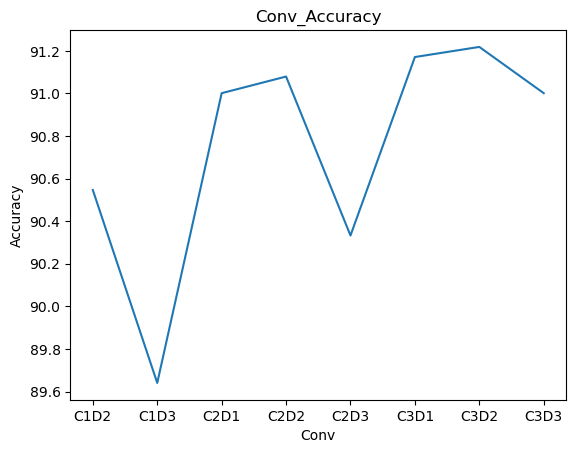

In [32]:
plt.plot( conv, results)
plt.title('Conv_Accuracy')
plt.xlabel('Conv')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# run an experiment
#def run_experiment(repeats=10):
 ## load data
 #trainX, trainy, testX, testy = load_dataset()
 ## repeat experiment
 #scores = list()
 #print(trainX.shape)
 #for r in range(repeats):
  #score = evaluate_model(trainX, trainy, testX, testy)
  #score = score * 100.0
  #print('>#%d: %.3f' % (r+1, score))
  #scores.append(score)
 ##summarize results
 #summarize_results(scores)

In [10]:
# run the experiment
run_experiment()

(7352, 128, 9) (7352, 1)
(2947, 128, 9) (2947, 1)
(7352, 128, 9) (7352, 6) (2947, 128, 9) (2947, 6)
(7352, 128, 9)
>#1: 90.702
>#2: 91.686
>#3: 91.347
>#4: 89.481
>#5: 90.126
>#6: 90.635
>#7: 91.042
>#8: 90.363
>#9: 91.415
>#10: 91.449
[90.7024085521698, 91.68646335601807, 91.34713411331177, 89.4808292388916, 90.12554883956909, 90.63454270362854, 91.0417377948761, 90.3630793094635, 91.41499996185303, 91.44893288612366]
Accuracy: 90.825% (+/-0.660)
